In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import select_random_rows


In [9]:
# read data
anom = np.load('anomaly_samples.npy',allow_pickle=True).astype(np.float64)
norm = np.load('normal_samples.npy',allow_pickle = True).astype(np.float64)

D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


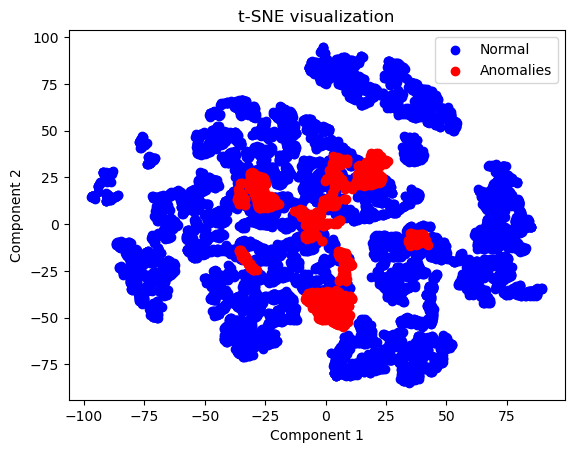

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample data (replace with your actual datasets)
data1 = select_random_rows(norm,10000)
data2 = select_random_rows(anom,1000)  # 200 data points, 7 features (dataset 2)

# Standardize features for each dataset independently
scaler1 = StandardScaler()
scaler2 = StandardScaler()
data1_scaled = scaler1.fit_transform(data1)
data2_scaled = scaler2.fit_transform(data2)

# Apply t-SNE to each scaled dataset (adjust parameters as needed)
perplexity = 30  # Adjust perplexity based on your data
tsne1 = TSNE(n_components=2, perplexity=perplexity)
tsne2 = TSNE(n_components=2, perplexity=perplexity)
data1_embedded = tsne1.fit_transform(data1_scaled)
data2_embedded = tsne2.fit_transform(data2_scaled)

# # Combine and perform PCA (optional, for centering and reducing to 2D)
# data_combined = np.vstack((data1_embedded, data2_embedded))
# pca = PCA(n_components=2)
# data_combined_pca = pca.fit_transform(data_combined)

# # Separate data for plotting based on origin
# data1_pca = data_combined_pca[:3000]  # Assuming first 100 points belong to dataset 1
# data2_pca = data_combined_pca[3000:]

# Create the scatter plot
plt.scatter(data1_embedded[:, 0], data1_embedded[:, 1], label='Normal',color = 'blue')
plt.scatter(data2_embedded[:, 0], data2_embedded[:, 1], label='Anomalies', color = 'red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE visualization')
plt.legend()
plt.show()